In [9]:
%reset

In [10]:
import pickle
import networkx as nx
from process_graphs import extract_graphs, find_all_undirected_graphlet_instances, get_instance_ratios, find_possible_n_nodes2, extract_multi_graphs

with open('data/medium_ubuntu.pkl', 'rb') as f:
    data = pickle.load(f)



In [11]:
tes = 'out_ar/rs_struct_summ_desc_out.pkl'
with open(tes, 'rb') as f:
    tes = pickle.load(f)
    
print(tes["output_distribution_cppls"][10])

[1728.8177381646226, 338.46527967983315]


In [12]:
ar_conv_out_path = 'out_ar/ar_conv_out.pkl'
ar_conv_struct_path = 'out_ar/ar_conv_struct_out.pkl'
ar_struct_summ_path = 'out_ar/ar_struct_summ_out.pkl'
ar_struct_desc_path = 'out_ar/ar_struct_desc_out.pkl'
ar_struct_summ_desc_path = 'out_ar/ar_struct_summ_desc_out.pkl'

In [13]:
graph_set, indeces_connected_graphs = extract_graphs(data)

multi_graph_set = extract_multi_graphs(data)

#save graphlets to file
import pickle


undirect_graphlet_instances = []
number_of_nodes = []
degree_node_0 = []
in_degree_node_0 = []
out_degree_node_0 = []
cc_node_0 = []
c1_graph = []
c1_graph_und = []

cc_node_d_0 = []
closeness_centrality = []
closeness_centrality_dir = []
avg_neighb = []

multi_degree_node_0 = []
multi_in_degree_node_0 = []
multi_out_degree_node_0 = []
multi_cc_node_0 = []
multi_c1_graph = []

for g, mg in zip(graph_set, multi_graph_set):
    new_g = g.to_undirected()
    #find clustering coefficient of node 0
    
    degree_node_0.append(new_g.degree(0))
    in_degree_node_0.append(g.in_degree(0))
    out_degree_node_0.append(g.out_degree(0))
    cc_node_0.append(nx.average_clustering(new_g))
    cc_node_d_0.append(nx.average_clustering(g))
    c1_graph.append(nx.clustering(g, 0))
    c1_graph_und.append(nx.clustering(new_g, 0))
    closeness_centrality.append(nx.closeness_centrality(new_g, 0))
    closeness_centrality_dir.append(nx.closeness_centrality(g, 0))
    avg_neighb.append(nx.average_neighbor_degree(new_g)[0])
    
    multi_degree_node_0.append(mg.degree(0))
    multi_in_degree_node_0.append(mg.in_degree(0))
    multi_out_degree_node_0.append(mg.out_degree(0))
    
    
    
    

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

with open(ar_conv_struct_path, 'rb') as f:
    ar_conv_struct_out = pickle.load(f)
    
with open('data/medium_ubuntu_true_addresses.pkl', 'rb') as f:
    gold = pickle.load(f)

print(ar_conv_struct_out.keys())

out_prob = []

for distrib_cppls, g in zip(ar_conv_struct_out['output_distribution_cppls'], gold):
    
    inv_distrib_cppls = [1/x for x in distrib_cppls]
    norm = sum(inv_distrib_cppls)
    distrib_prob = [x/norm for x in inv_distrib_cppls]
    out_prob.append(distrib_prob[g])

dict_keys(['output', 'output_cppls', 'output_distribution_cppls', 'row'])


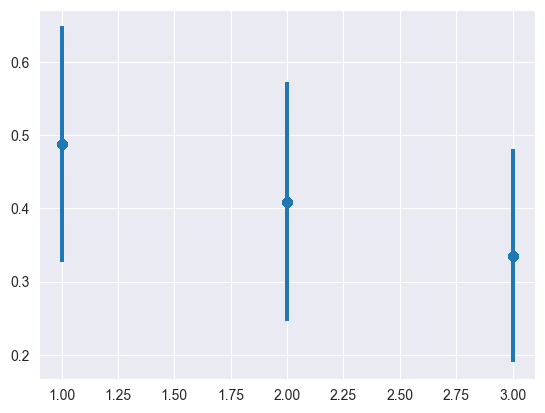

In [15]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(degree_node_0, out_prob):
    values = [x for x,y in zip(out_prob, degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(degree_node_0, new_cc_value)
plt.errorbar(degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

    


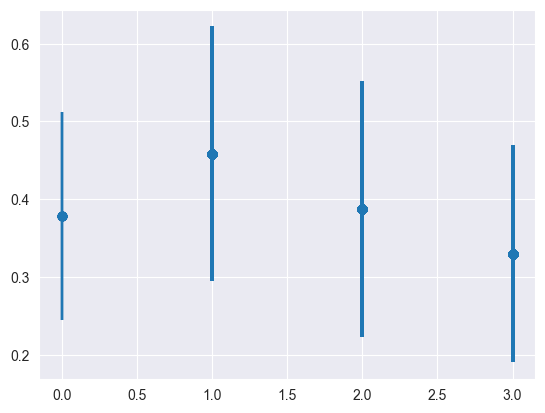

In [16]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(in_degree_node_0, out_prob):
    values = [x for x,y in zip(out_prob, in_degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(in_degree_node_0, new_cc_value)
plt.errorbar(in_degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

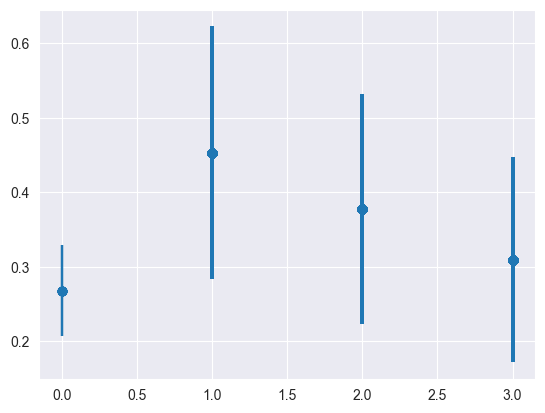

In [17]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(out_degree_node_0, out_prob):
    values = [x for x,y in zip(out_prob, out_degree_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(out_degree_node_0, new_cc_value)
plt.errorbar(out_degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

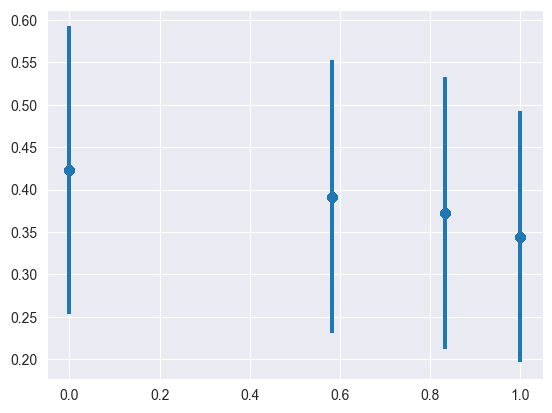

In [18]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(cc_node_0, out_prob):
    values = [x for x,y in zip(out_prob, cc_node_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(cc_node_0, new_cc_value)
plt.errorbar(cc_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

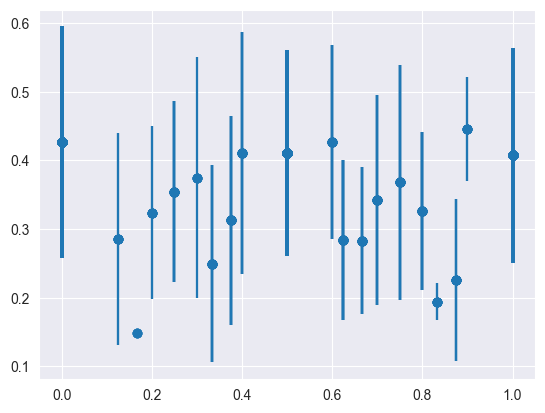

In [19]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(c1_graph, out_prob):
    values = [x for x,y in zip(out_prob, c1_graph) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(c1_graph, new_cc_value)
plt.errorbar(c1_graph, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

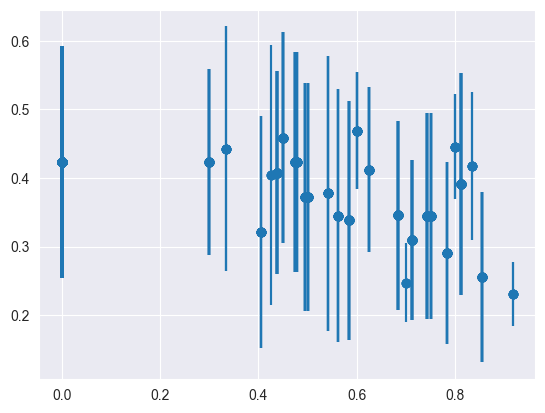

In [20]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(cc_node_d_0, out_prob):
    values = [x for x,y in zip(out_prob, cc_node_d_0) if cc-w <= y <= cc+w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(cc_node_d_0, new_cc_value)
plt.errorbar(cc_node_d_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

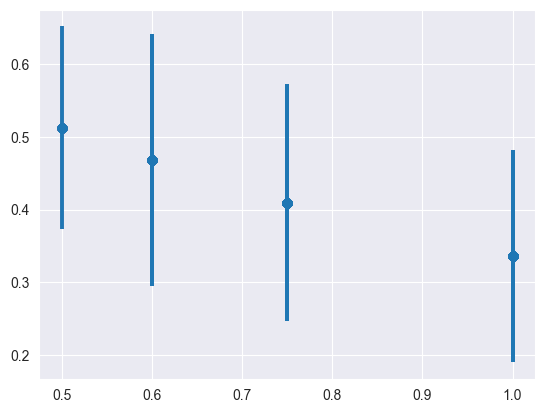

In [21]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(closeness_centrality, out_prob):
    values = [x for x, y in zip(out_prob, closeness_centrality) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(closeness_centrality, new_cc_value)
plt.errorbar(closeness_centrality, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

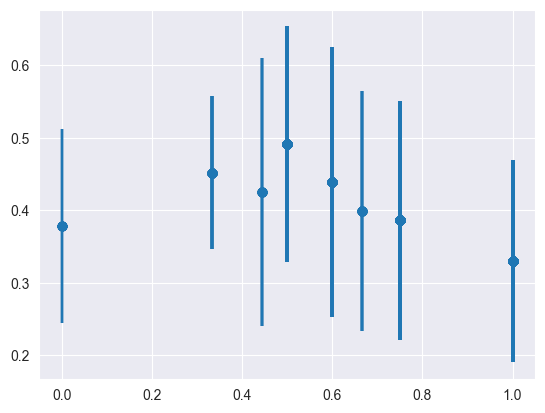

In [22]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(closeness_centrality_dir, out_prob):
    values = [x for x, y in zip(out_prob, closeness_centrality_dir) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(closeness_centrality_dir, new_cc_value)
plt.errorbar(closeness_centrality_dir, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

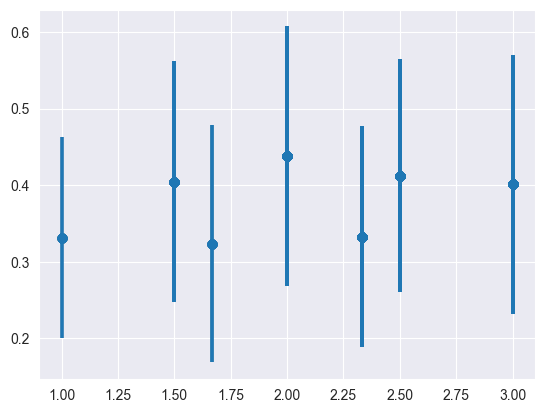

In [23]:
plt.show()
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(avg_neighb, out_prob):
    values = [x for x, y in zip(out_prob, avg_neighb) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(avg_neighb, new_cc_value)
plt.errorbar(avg_neighb, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

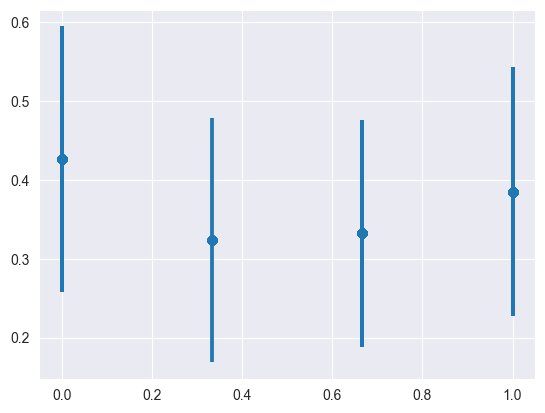

In [24]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(c1_graph_und, out_prob):
    values = [x for x, y in zip(out_prob, c1_graph_und) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(c1_graph_und, new_cc_value)
plt.errorbar(c1_graph_und, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

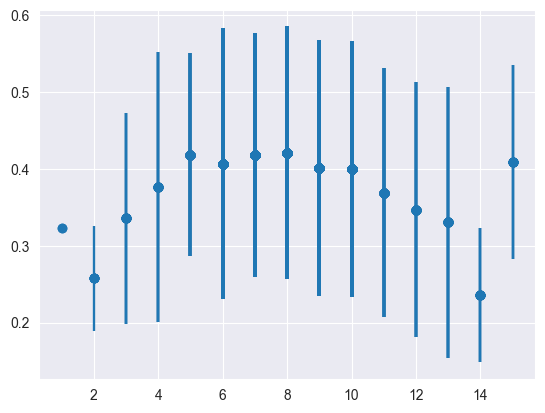

In [25]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(multi_degree_node_0, out_prob):
    values = [x for x, y in zip(out_prob, multi_degree_node_0) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(multi_degree_node_0, new_cc_value)
plt.errorbar(multi_degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

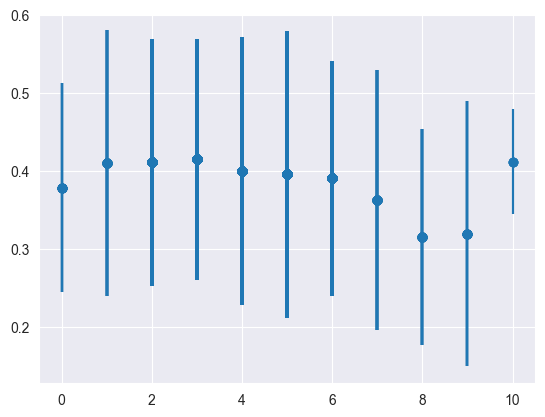

In [26]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(multi_in_degree_node_0, out_prob):
    values = [x for x, y in zip(out_prob, multi_in_degree_node_0) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(multi_in_degree_node_0, new_cc_value)
plt.errorbar(multi_in_degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()

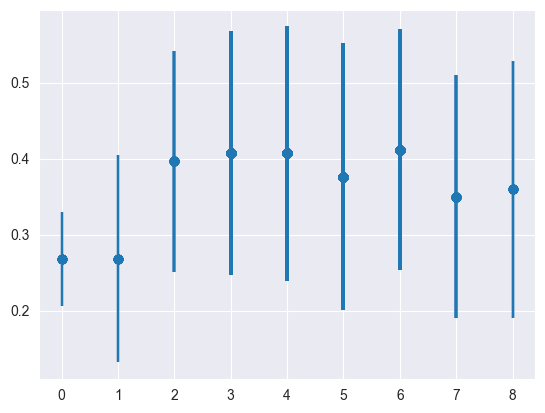

In [27]:
#for each x in clustering coefficient of node 0, average across all y between x-w and x+w. report variance
import numpy as np

w = 0.01

new_cc_value = []
new_cc_var = []

for cc, prob in zip(multi_out_degree_node_0, out_prob):
    values = [x for x, y in zip(out_prob, multi_out_degree_node_0) if cc - w <= y <= cc + w]
    new_cc_value.append(np.mean(values))
    new_cc_var.append(np.std(values))

#plot graph
import matplotlib.pyplot as plt

plt.scatter(multi_out_degree_node_0, new_cc_value)
plt.errorbar(multi_out_degree_node_0, new_cc_value, yerr=new_cc_var, fmt='o')
plt.show()